<a href="https://colab.research.google.com/github/GvdDool/Notebook-test/blob/master/Geo_Referencing_a_Figure_as_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1> Geo-Referencing a Figure as Image</h1>

Working on the general text, and introduction will come later

All data used for this project is zipped up in the GitHub folder belonging to this NoteBook.


In [0]:
# Commented out libaries are needed, but are loaded at the place of use in this NoteBook,
# with explainations and documentation links (when  needed)
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
#from matplotlib.backends.backend_agg import FigureCanvasAgg

#import gdal, ogr, os, osr

#import rasterio
#import rasterio.plot
#from affine import Affine


%matplotlib inline

The data in this project is Open Source, and not related to an active project.
In this case the major cities of France are selected as observation points, when running the code with your own data the points, lines, and polygons can be labled, formated, and displayed to reflect the data you want to visualise. Data formating and visualisation in beyond the scope of this NoteBook.

In [0]:
#Load the points
file_path = r"D:\Study\Coding\Data\Administrative_Data\FRA_adm\FRA_gaz\FRA_CitiesTop100_edit.txt"
city_df = pd.read_csv(file_path, sep=";")

# Open point data with geopandas
geo_FR_df = gpd.GeoDataFrame(city_df,geometry=gpd.points_from_xy(city_df.LON, city_df.LAT))

#Setting the original projection of the points
geo_FR_df.crs = 'epsg:4326'

#Changing the projection to match the projection of the image
# Note: when an image is created setting the projection can be done by reading the .crs information of the image,
# but in this case the points are loaded before the image is constructed so the projection change can be checked
# visually.
points = geo_FR_df.to_crs(epsg=3395)
print("Current projection: ", points.crs)

Current projection:  epsg:3395


This project was started because of the need to show more detailed maps that avavilable in the geopandas library. For small display of large scale maps the standard maps provide sufficient detail, but when zooming in to an area of intrest the quality of the default maps is no longer sufficient to display the information

To illustrate the process boundary data is collected for all the countries around France, and for France an higher level of admanistrative boundarie is selected to give some more detail in the "Area of Intrest".
The boundary data for this project is obtained from http://www.diva-gis.org/gdata, using the data provided by https://gadm.org/ The cities are obtained by combining the gazeteer data listed on Diva-GIS with a list from http://www.map-france.com/cities/

The structure below is edited and won't be working for the code in this example, to run the code, please, download the data, store locally, and update the paths accoudantly.

<h2>Loading the Data</h2>


In [0]:
map_file_FR = r"D:\Study\Coding\Data\Administrative_Data\FRA_adm\FRA_adm1.shp"
map_file_EU = r"D:\Study\Coding\Data\Administrative_Data\Europe\europe_100km.shp"

map_file_BEL = r"D:\Study\Coding\Data\Administrative_Data\BEL_adm\BEL_adm0.shp"
map_file_NLD = r"D:\Study\Coding\Data\Administrative_Data\NLD_adm\NLD_adm0.shp"
map_file_LUX = r"D:\Study\Coding\Data\Administrative_Data\LUX_adm\LUX_adm0.shp"
map_file_DEU = r"D:\Study\Coding\Data\Administrative_Data\DEU_adm\DEU_adm0.shp"
map_file_CHE = r"D:\Study\Coding\Data\Administrative_Data\CHE_adm\CHE_adm0.shp"
map_file_ITA = r"D:\Study\Coding\Data\Administrative_Data\ITA_adm\ITA_adm0.shp"
map_file_ESP = r"D:\Study\Coding\Data\Administrative_Data\ESP_adm\ESP_adm0.shp"
map_file_GBR = r"D:\Study\Coding\Data\Administrative_Data\GBR_adm\GBR_adm0.shp"
map_file_FRA = r"D:\Study\Coding\Data\Administrative_Data\FRA_adm\FRA_adm0.shp"




In [0]:
# using the gropandas libary to load the spatial data
# world0 is not used, but can be shown as an example instead of the boundaries for the countries
# eea_EU is also not used, both layers are too course for this purpose
world0 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
eea_EU = gpd.read_file(map_file_EU)
eea_FR = gpd.read_file(map_file_FR)

eea_BEL = gpd.read_file(map_file_BEL)
eea_NLD = gpd.read_file(map_file_NLD)
eea_LUX = gpd.read_file(map_file_LUX)
eea_CHE = gpd.read_file(map_file_CHE)
eea_ITA = gpd.read_file(map_file_ITA)
eea_ESP = gpd.read_file(map_file_ESP)
eea_GBR = gpd.read_file(map_file_GBR)
eea_FRA = gpd.read_file(map_file_FRA)

geoList = [eea_BEL, eea_NLD, eea_LUX, eea_CHE, eea_ITA, eea_ESP, eea_GBR]

rdf = gpd.GeoDataFrame( pd.concat(geoList, ignore_index=True))
#rdf.crs = {'init': 'epsg:4326'}
rdf.crs = "epsg:4326"
rdf = rdf.to_crs("EPSG:3395")

eea_FRA = eea_FRA.to_crs("EPSG:3395")
eea_FR = eea_FR.to_crs("EPSG:3395")

print(eea_FRA.total_bounds)
# From the geopanda documentation:
# total_bounds: tuple containing minx, miny, maxx, maxy

[-572599.75816295 5033468.37833345 1064260.66556235 6603853.14563992]


*The relationship between x/y and lat/long* <br>
Latitude values (lat) increase or decrease along the vertical axis, the Y axis (rows).<br>
Longitude changes (long) value along the horizontal access, the X axis (cols).<br>
The rest of this Notebook will use X/Y as a notation for coordinates when plotting the map <br>
<br>
Looking at the print-out of the function call in the output, we can conclude that <br>
*Example output:*

| Position | Coordinates
| --- | --- 
| left | -572599 
| bottom | 5033468
| right | 1064260
| top | 6603853

<p>Also note that the projection system has changed, in this example the original data (points and polygons) are projected in WGS 84 -- WGS84 - World Geodetic System 1984 (epsg:4326) and reprojected to WGS 84 / World Mercator (EPSG:3395). The first projection system is used in GPS and can be used globally, the units are in degree (and supplier to define representation, number of decimals). The later is more appropiarate for maps with a Euro-centric view of world excluding polar areas. The units are in metres and mainly used between 80°S and 84°N. (https://epsg.io/)</p>
<p> The units in the table are metres, the zerro Longitude line is running over Greenwich, the negative left sides means that France starts West of this line. </p>


('Width: ', 12.245736158168677)  // Height:  12.269231782043073


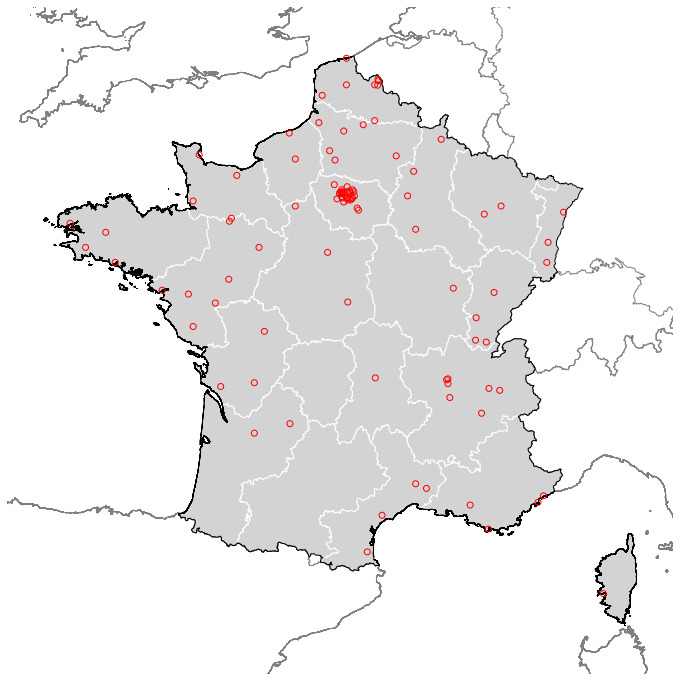

In [0]:
# print(eea_FR.total_bounds)
# Expanding the area of interest to have a bit clearnace around the edges of the data
# Values are set to get an image which is almost square (~12.25x12.25)
# These values have to be set based on the area of interest and the projection
minx, miny, maxx, maxy = eea_FR.total_bounds
minx = minx - 100000
miny = miny - 135000
maxx = maxx + 100000
maxy = maxy + 135000

#Setting the dimentions of the figure
print(("Width: ", (maxx - minx)/150000), " // Height: ", (maxy - miny)/150000)

#figsize : (float, float), as width, height
f, ax = plt.subplots(1, figsize=((maxx - minx)/150000,(maxy - miny)/150000))
ax.set(xlim=(minx, maxx), ylim=(miny, maxy))

#plotting on the defined axis => ax=ax
eea_FR.plot(color='lightgrey', edgecolor='white', ax=ax)
rdf.plot(facecolor='none', color='none', edgecolor='grey', ax=ax)
eea_FRA.plot(facecolor='none', color='none', edgecolor='black', ax=ax)
ax.set_axis_off()

# In this example the points are on, and saved with the image, to prove that the method is returnin the desired result
# The code is intended to run without the contol points
points.plot(ax=ax, facecolor='none', edgecolor='red')

plt.savefig('FRA_map1.eps', dpi=1080, bbox_inches='tight')
plt.show()


This is the example background map, with France in grey, and white provencial boundaries, the borders of the surounding France are set to dark grey without a fill.
<br>
When you are running this code with your own data the layout can be set to your own preferences, peronally I like background maps to be as neutal as possible so that the attention is drawn to the important elements of the map, in this case the cities in France.<br>
<br>
<h2>Preparing the export</h2>
The next part of the code is preparing the figure to be saved in a geotiff format to be used in another NoteBook, thus all formating to the map has to be done before this point.

In [0]:
# Removing the white spaces around the image
f.tight_layout(pad=0)

# There are methods to work with the data in the figure by convering the image to a data array.
# In NumPy the image is read from the MatPlotLib libary as a Canvas.
data = np.frombuffer(f.canvas.tostring_rgb(), dtype=np.uint8)
print(data)
data.shape

# However, obtaining the data in this form is not useful because it's a one dimention shape, 
# with no information about the numner of rows and columns.

[255 255 255 ... 255 255 255]


(1389240,)

In [0]:
# MatPlotLib as another method to convert a Canvas to an Array:
# https://matplotlib.org/3.1.1/gallery/user_interfaces/canvasagg.html
from matplotlib.backends.backend_agg import FigureCanvasAgg

canvas = FigureCanvasAgg(f)
# Save the figure to a string.
canvas.draw()
s, (width, height) = canvas.print_to_buffer()

# Convert to a NumPy array.
X = np.frombuffer(s, np.uint8).reshape((height, width, 4))

In [0]:
# The result of the scaling earlier is that we have now a new matrix with almost equal dimentions
# The pixel resolution in this example should therefore also be almost equal.
X.shape

(883, 881, 4)

In [0]:
# The original colours are stored in the last dimention of the image matrix, as a list with four atributes
# In this example the colours are compressed to a grey value, the created map is a background map with neutral coulours,
# there is no need to store the original values in a multi-band image.
print(X[:,:,0])

# Converting four bands to Grey(Y) = 0.2989 R + 0.5870 G + 0.1140 B 
# The fourth column is used for alpha (trasparantcy) which is not used in this example and is set to 0 
Y = (0.2989 * (X[:,:,0])) + (0.5870 * (X[:,:,1])) + (0.1140 * (X[:,:,2]))



[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [0]:
# Checking the dimentions of the new matrix holding the grey values
Y.shape

(883, 881)

In [0]:
#Checking a grey value in the middel of the map (France)
Y[400,400]

210.9789

In the next cell of this NoteBook the figure is exported to an image using the GDAL libary, with:
- .GetDriverByName: export as geotiff 
- .SetGeoTransform: to preserve the coordinates
- osr.SpatialReference: as well as the projection, in this example hard coded (3395)



In [0]:
import gdal, ogr, os, osr

# Export array to raster
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    #newRasterfn: File Name
    #rasterOrigin: upper left corner
    #pixelWidth: cell dimetion (w)
    #pixelHeight: cell dimetion (h)
    #array: the data from the figure
    
    cols = array.shape[1] 
    rows = array.shape[0] 
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, -pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(3395)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()
    print("Image saved to disk")

# Creating the Image from a Figure
def createImageFromFigure(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    # depending of the use of the image the data has to be reversed, in this example the data is not revervesed
    # because the function reading the data will take care of projecting the data correctly when reading the
    # created meta data
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    
    # Uncomment / Comment the function call you want to use:
    # array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array) # convert array to raster


# Number of rows and columns in the image
cols = Y.shape[1]
rows = Y.shape[0]

# Ideally the pixel dimentions are equql (or close to equal) when creating a image from the figure
# in this example the sizes are almost indentical (~2084)
print("Rechecking the dimentions")
print("cols (X): ", cols, " // rows (Y): ", rows)
pixelWidth =  (maxx - minx) / (cols)
pixelHeight = (maxy - miny) / (rows)

print("Cell size: ", int(pixelWidth), " (w) , ", int(pixelHeight), " (h)")

#Obtaining the upper left corner coordinates
rasterOrigin = (minx, maxy)
print("rasterOrigin: ", rasterOrigin)

# Name of the image, the image will be saved in the location of the NoteBook
newRasterfn = 'test3b.tif'

# Creating the image from the figure data, with:
# newRasterfn: File Name
# rasterOrigin: upper left corner
# pixelWidth: cell dimetion (w)
# pixelHeight: cell dimetion (h)
# array: the data from the figure
createImageFromFigure(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,Y)



Rechecking the dimentions
cols (X):  881  // rows (Y):  883
Cell size:  2084  (w) ,  2084  (h)
rasterOrigin:  (-672599.7581629481, 6738853.145639915)
Image saved to disk


<h2>Summary</h2>

This conclude the first part of the code, to sumarise what we have done so far:
<ol>
<li>Vector data was loaded to a MatPlotLib figure, including:</li>
<ol>
<li>Point data: cities</li>
<li>Polygon data: administrative boundaries</li>
</ol>
</li>
<li>Reprojection of the data</li>
<ol>
<li>Original: epsg:4326</li>
<li>Reprojected: EPSG:3395</li>
</ol>
<li>Obtained the figure data in an array (MxN)</li>
<li>Obtained the parameters for the meta data</li>
<li>Stored the information as a GeoTiff</li>
</ol>
<br>
<h2>Visualising the Exported Image</h2>

The next part of the NoteBook will load the data, and use the image as a background map to show new information. This part is relatively short because the main purpose is to make it light weight to suport the target NoteBook with a background image without much overhead in terms of data and code used, so that the main focus of the Notebook can go to the topic of the NoteBook instead of data conversion.
<br>
<br>
Thus there are only two active cells:

1. the loading of the created GeoTiff
2. the displaying of the created Geotiff


The displayed figure can be enriched with much more infromation, relative to the analysis and the NoteBook




In [0]:
# Reintroducing libaries for when the code is run from another Notebook
# Only new libaries and needed code are enabled in this example, 
# please check your settings before running
#import numpy as np
#import pandas as pd
#import geopandas as gpd
#import matplotlib.pyplot as plt

import rasterio
import rasterio.plot
from affine import Affine


In [0]:
#Reloading the points
#file_path = r"D:\Study\Coding\Twitter\ESWB\ESWD_20170101_20191231_Hail_E2.csv"
#hail_df = pd.read_csv(file_path, sep=";")
#hail_france = hail_df[hail_df["COUNTRY"] == 'FR'].copy()
#hail_france.head()


# Open fire boundary data with geopandas
#geo_FR_df = gpd.GeoDataFrame(hail_france,geometry=gpd.points_from_xy(hail_france.LONGITUDE, hail_france.LATITUDE))

#geo_FR_df.crs = 'epsg:4326'
#print(geo_FR_df.crs)


#points = geo_FR_df.to_crs(epsg=3395)
#points = geo_FR_df.to_crs(epsg=4326)
# Check if points is in memory:
print(points.crs)

epsg:3395


In [0]:
# directory path and file name
path = r'D:\Study\Coding\Twitter\DataVis/'
file_in = 'test3b.tif'

# read in file with geotiff geographic information
src = rasterio.open(path + file_in)

# print out metadata information
print("check metadata information")
for k in src.meta:
    print(k,src.meta[k])

# Retrieve the affine transformation
if isinstance(src.transform, Affine):
     transform = src.transform
else:
     transform = src.affine

N = src.width
M = src.height
dx = transform.a
dy = transform.e
minx = transform.c
maxy = transform.f

print("new coords")
print("upper left: ", minx, maxy)
print("cell size: ", dx, dy)
print("columns and rows:", M, N)
print("bounds: ", src.bounds)

# Generate X and Y grid locations
xdata = minx  + dx*np.arange(N+1)
ydata = maxy  + dy*np.arange(M,-1,-1)

print("check new coodinates")
extent = [xdata[0], xdata[-1], ydata[0], ydata[-1]]
          
print("extent: ",  [xdata[0], xdata[-1], ydata[0], ydata[-1]])
print("extent: ", extent)

#Reading the data, and checking the orientation
data_in = src.read(1)
print(dy)
if dy < 0:
    print("flip the array")
    dy = -dy
    data_in = np.flip(data_in, 0)


check metadata information
driver GTiff
dtype uint8
nodata None
width 881
height 883
count 1
crs EPSG:3395
transform | 2084.97, 0.00,-672599.76|
| 0.00,-2084.24, 6738853.15|
| 0.00, 0.00, 1.00|
new coords
upper left:  -672599.7581629481 6738853.145639915
cell size:  2084.9721041149846 -2084.240959576966
columns and rows: 883 881
bounds:  BoundingBox(left=-672599.7581629481, bottom=4898468.378333454, right=1164260.6655623533, top=6738853.145639915)
check new coodinates
extent:  [-672599.7581629481, 1164260.6655623533, 4898468.378333454, 6738853.145639915]
extent:  [-672599.7581629481, 1164260.6655623533, 4898468.378333454, 6738853.145639915]
-2084.240959576966
flip the array


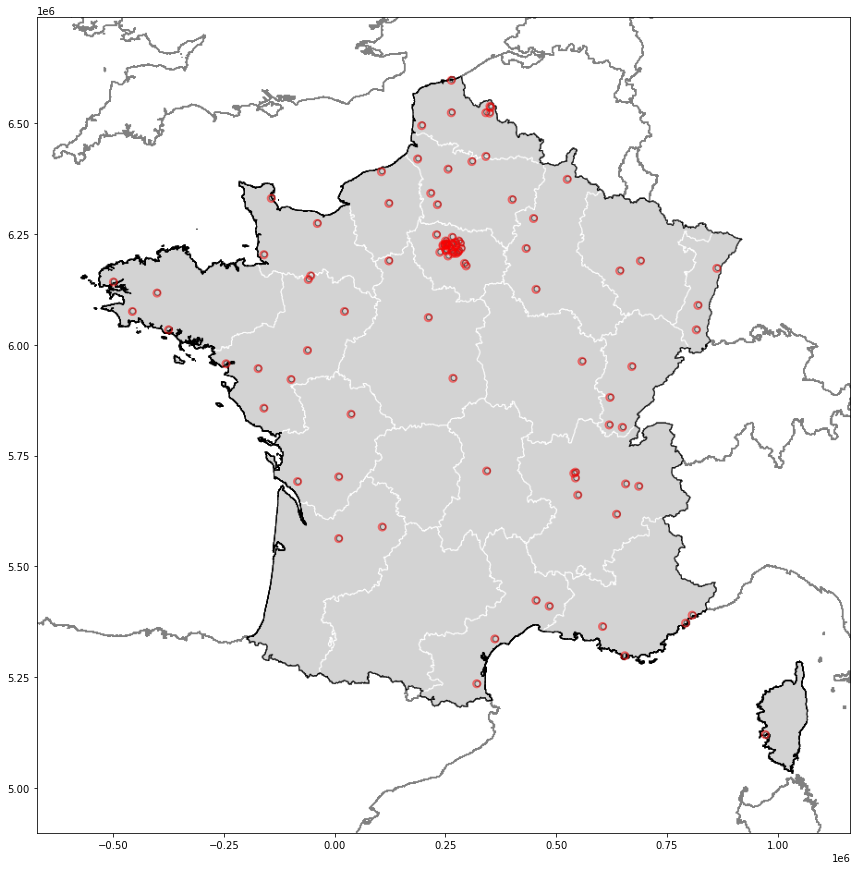

In [0]:
# Creating the new figure with the image as background
fig, ax = plt.subplots(figsize=(15, 15)) #
rasterio.plot.show(src, ax=ax, cmap='gist_gray')
points.plot(ax=ax, facecolor='none', edgecolor='red', markersize=50, linewidth=2,alpha=0.5)
plt.show()